**Project**: Predicting Customer Churn: Identifying Customers that are Susceptible to Churn

**Track**: Data Analytics

**Tech Stack**: Python

**Dataset**: Source: Amdari

**Author**: Aniekan Charles Ekanem

Identifying customers that are subsceptible to churn in order to enhance retention strategies and boost business growth

In [1]:
# Importing Libraries

import csv
import os

from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.getcwd()) # checking the current working directory since I am getting error message file not found

/home/aniekan/jupyterlab_datasets_for_practice/My unique personal projects/amdari/telco


# Data Collection
Load the dataset into Python with Pandas

In [3]:
df=pd.read_excel('Dataset.xlsx')

## Data Exploration

In Data Exploration, the following will be looked into:
- understanding the data structure, statistics, and quality of the dataset,
- visualizing the data to gain insights,
- checking for missing values.

See the first few rows

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


# A quick overview of the dataset

Checking for missing values

In [5]:
df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Checking for duplicated values

In [6]:
df.duplicated().any()

False

Get a statistical overview of the numerical columns in the dataset

In [7]:
stats_overview = df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


The above has given the numerical columns and their various statistics.  If you noticed in the datset, the mean churn label is 0.5, this shows a balanced dataset meaning half have churned while half have not churned.  The problem with an imblanced dataset is that at the end of training the model, the model may be biased because it will struggle to identify the other set of data that are limited compared to the other set that are more.  Hence there is the need to create for a balanced data for effective predictive model building

The prediction according to this project is on the churn label but how does it relate to the other variables?

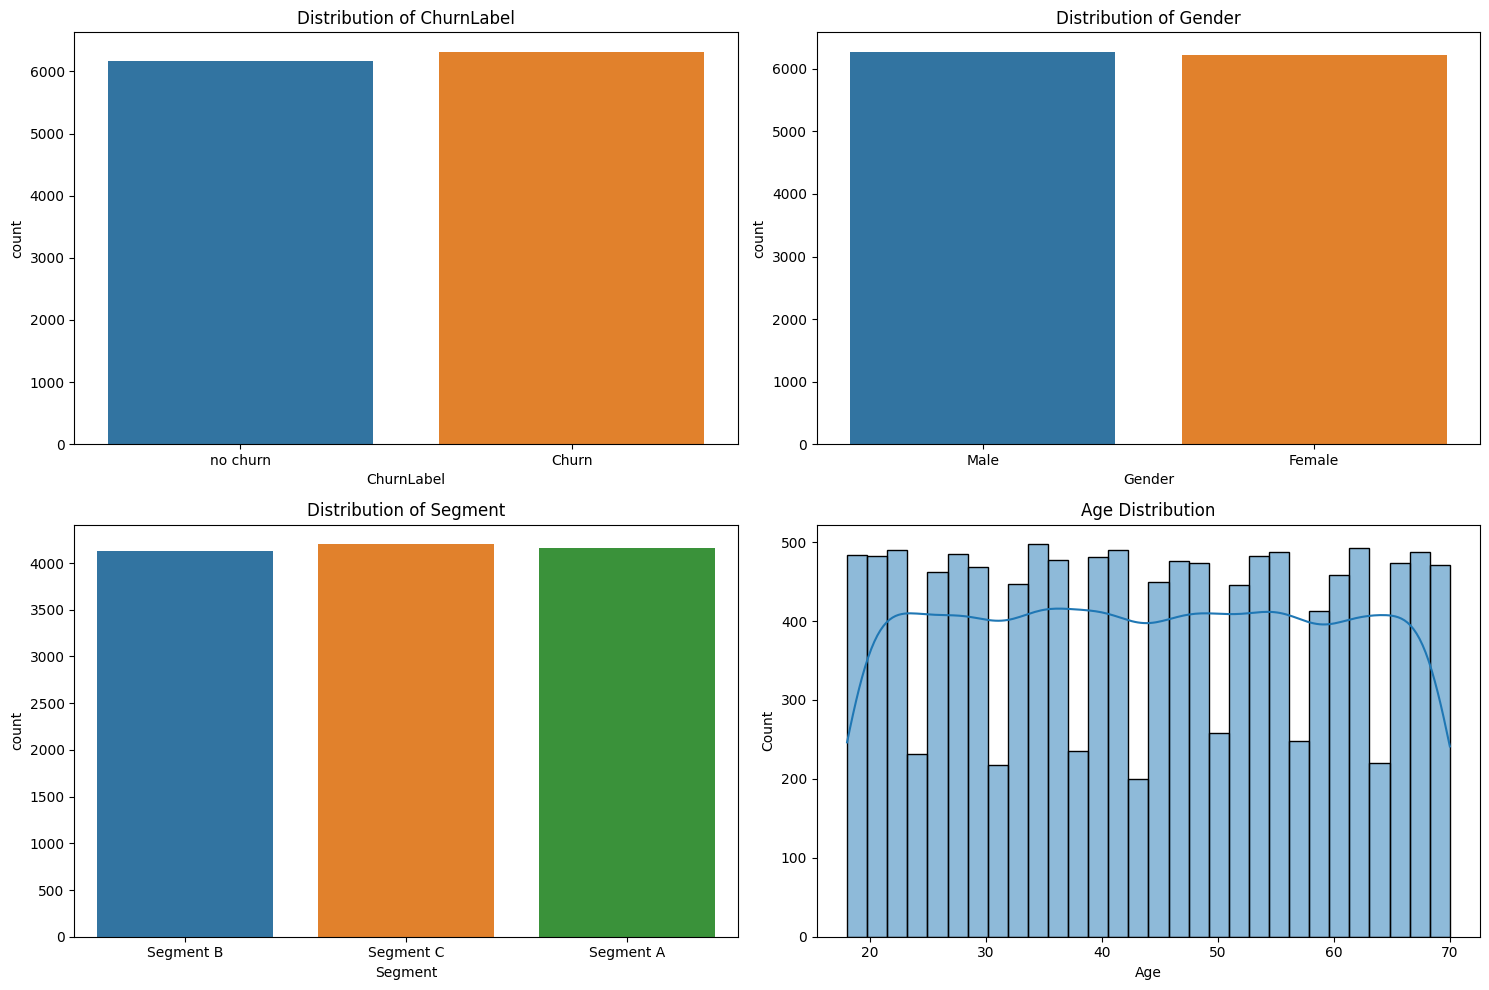

In [8]:
# setup the figure and the axes

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot the distribution of the target variable 'ChurnLabel'
sns.countplot(x='ChurnLabel', data=df, ax=ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['no churn', 'Churn'])

# plot distribution of the gender
sns.countplot(x='Gender', data=df, ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')

# plot distribution of segment
sns.countplot(x='Segment', data=df, ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# age distribution
sns.histplot(df['Age'], bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

**Correlation Analysis**
This tells us which column in the dataset correlates with the 'ChurnLabel' column.  This is necessary because you get to know which column has a higher influence on the ChurnLabel.  In essence, correlation involves how much two variables move together in the same distribution.

Correlation can be:
- Positive correlation
- Negative correlation
- No correlation

In [9]:
# viewing how the columns correlate with one another 
df.select_dtypes(include=np.number).corr()

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


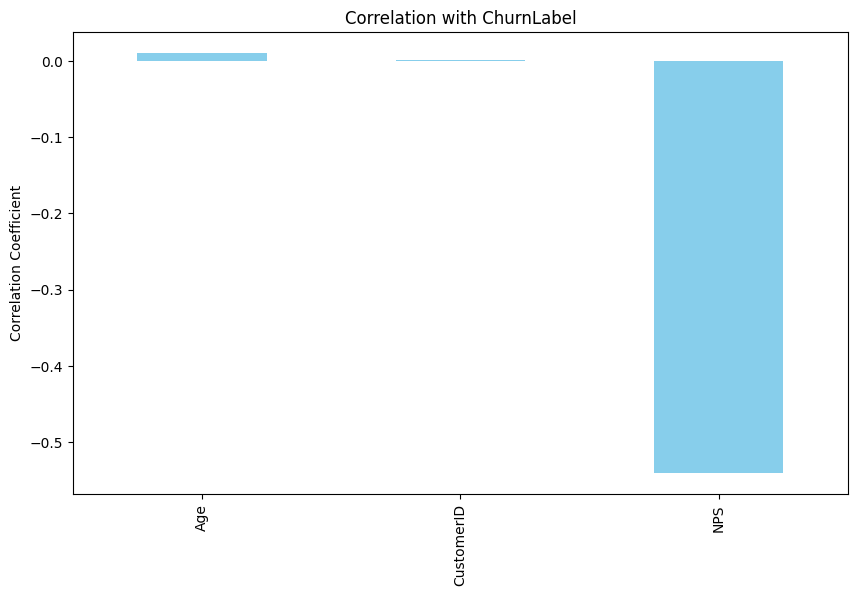

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [10]:
# calculate correlation with ChurnLabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# plot the correlation
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

We can see that the NPS has a level of influence on the ChurnLabel.  Next is to explore the nested columns and see how they are nested

In [11]:
# list out all the nested columns

# listing out all columns from df
all_columns = df.columns.tolist()
all_columns

['CustomerID',
 'Name',
 'Age',
 'Gender',
 'Location',
 'Email',
 'Phone',
 'Address',
 'Segment',
 'PurchaseHistory',
 'SubscriptionDetails',
 'ServiceInteractions',
 'PaymentHistory',
 'WebsiteUsage',
 'ClickstreamData',
 'EngagementMetrics',
 'Feedback',
 'MarketingCommunication',
 'NPS',
 'ChurnLabel',
 'Timestamp']

In [12]:
# copying the above result and removing the non-nested columns
nested_columns = [
 'PurchaseHistory',
 'SubscriptionDetails',
 'ServiceInteractions',
 'PaymentHistory',
 'WebsiteUsage',
 'ClickstreamData',
 'EngagementMetrics',
 'Feedback',
 'MarketingCommunication',
 ]
# Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporar Analysis: Exploring how the Churn rate changes over time to see if there are any recurring pattern

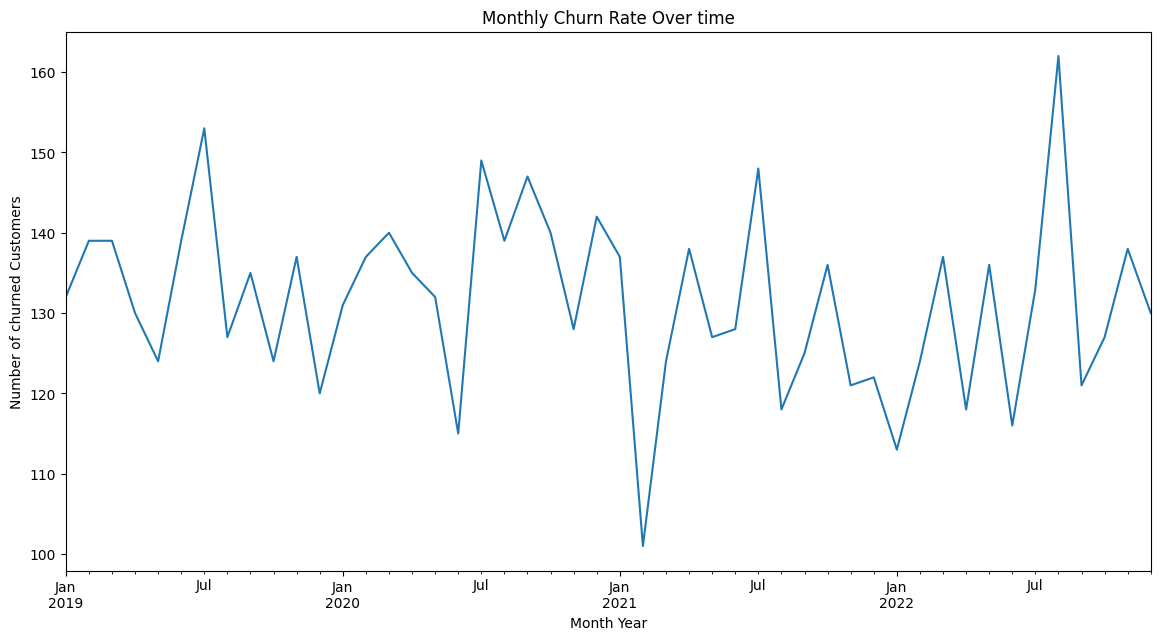

In [13]:
# converting the Timestamp to datetime format so that it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# group by MonthYear and calculate the churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# plot the churn rate over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over time')
plt.ylabel('Number of churned Customers')
plt.xlabel('Month Year')
plt.show()

The above shows there is no pattern on churning activities of customers

Checking to see if the rating influences the cudtomer churning activities

AttributeError: 'numpy.int64' object has no attribute 'startswith'

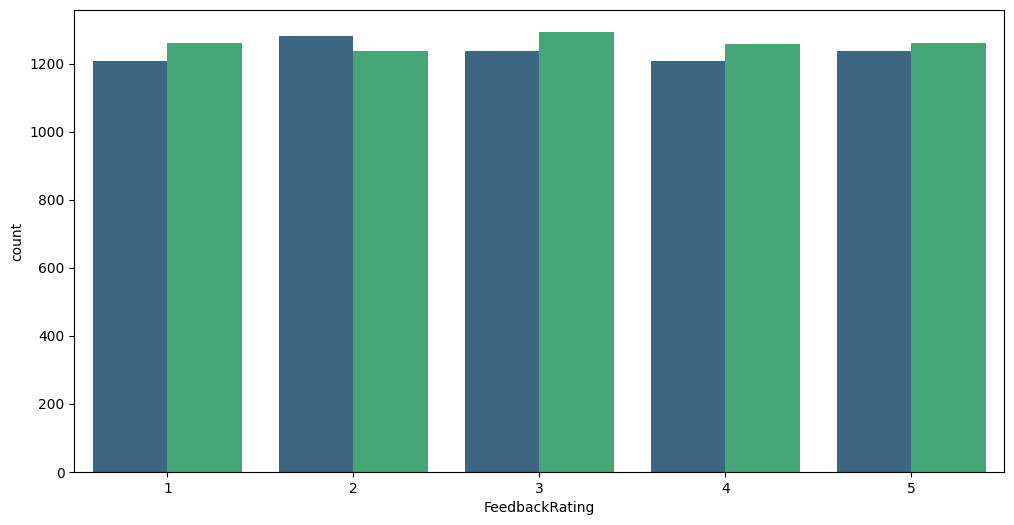

In [14]:
# rating is created from the feedback column and a new column created for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# plotting the relationship between feedback ratings and churn
plt.figure(figsize=(12,6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship betwwen Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])

From the visualization above there doesn't seem to be any indication that the fedback rating affects the churn label

# Data Preprocessing and Feature Engineering

Here, we will do the following:

- Creating new features that could have influence on the churning activities of customers i.e. showing predictive power ability.
- Employing other variables that could influence the prediction that are not categorical by Converting them to numeric variables, using encoding techniques
- Scaling or normalizing numeric variables if necessary
- Splitting the data into training and testing subsets.
- Removing irrelevant features.

Recalling from the dataset, some variables could influence the churning activity of a customer which are categorical but encoded as texts instead of numerical e.g 'ServiceInteractions' has categorical variables which are in string format.  If it is to be used in a machine learning model, it has to be converted to numerical format first before proceeding with building the model.  So each category which is in text format will then be mapped to a number.

Such variables are under the nested variables.  However, each of these categorical variables is a list of Python dictionaries in string format which cannot be used for the model.  To make use of these categorical variables, they must be converted back to the Python dictionary using literal eval function (literal_eval).

In [15]:
consecutive_columns_df = df.iloc[:, 7:-1]
consecutive_columns_df.head()

,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear
0,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01
1,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01
2,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04
3,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28,2020-03
4,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...","{'Plan': 'Basic', 'Start_Date': '2021-04-08', ...","[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22,2019-04


In [16]:
# recalling the nested columns variable declaration
nested_columns = nested_columns
nested_columns

['PurchaseHistory',
 'SubscriptionDetails',
 'ServiceInteractions',
 'PaymentHistory',
 'WebsiteUsage',
 'ClickstreamData',
 'EngagementMetrics',
 'Feedback',
 'MarketingCommunication']

In [17]:
# apply the literal_eval function on these nested columns

for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More features will be extracted from the dataset

In [18]:
# extracting from the PurchaseHistory column

df['PurchaseProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum ([i['Value'] for i in x]))

# extracting from the SubscriptionDetails column
# in this case the SubscriptionDetails column is just a dictionary and not a list since it has only 1 dictionary
# hence the approach will be different from those of more than 1 dictionary
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# extracting from the WebsiteUsage column
# approach same as for SubscriptionDetails column
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# extracting from the EngagementMetrics column
# approach same as for SubscriptionDetails column
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# extracting from the Feedback column
# approach same as for SubscriptionDetails column
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# extracting from the MarketingCommunication column
# df['MarketCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: '|'.join([i['Email Sent'] for i in x]))
# df['MarketCommunicationEmailsOpened'] = df['MarketingCommunication'].apply(lambda x: '|'.join(i['Email Opened'] for i in x]))
# df['MarketCommunicationEmailsClicked'] = df['MarketingCommunication'].apply(lambda x: '|'.join(i['Email Clicked'] for i in x]))

df['MarketCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketCommunicationClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
        
df['MarketCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

In [19]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,SubscriptionEndDate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketCommunicationNoOfEmails,MarketCommunicationClickDiff,MarketCommunicationSentOpenDiff
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0,818.0
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,2022-05-07,290,100,9,9,Weekly,Wish what bag cut life. Statement might opport...,9,88.0,110.0
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,2020-08-19,319,1,97,19,Monthly,Some Democrat guess but short. Whether behind ...,8,117.0,333.0
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,2022-03-27,803,25,31,4,Daily,Yard feel never miss ask billion Congress. Fly...,10,423.0,159.0
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,2022-11-09,580,77,51,12,Weekly,Ten determine unit interview challenge stock. ...,7,96.0,193.0


In [20]:
df_truncate = df.iloc[:, 23:-1]
df_truncate

,PurchaseProducts,PurchaseFrequency,PurchaseValue,SubscriptionPlan,SubscriptionStartDate,SubscriptionEndDate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketCommunicationNoOfEmails,MarketCommunicationClickDiff
0,"Frozen Cocktail Mixes|Printer, Copier & Fax Ma...",38,3994.72,Express,2020-06-08,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0
1,Watercraft Polishes|Baby Protective Wear|Footbags,4,2844.35,Pro,2021-07-21,2022-05-07,290,100,9,9,Weekly,Wish what bag cut life. Statement might opport...,9,88.0
2,"Vehicle Waxes, Polishes & Protectants|Pipe Cap...",14,1866.52,Essential,2019-10-05,2020-08-19,319,1,97,19,Monthly,Some Democrat guess but short. Whether behind ...,8,117.0
3,Mouthwash|Crêpe & Blini Pans|Vehicle Performan...,28,1378.64,Smart,2020-01-14,2022-03-27,803,25,31,4,Daily,Yard feel never miss ask billion Congress. Fly...,10,423.0
4,Ice Cream Novelties|Fire Extinguisher & Equipm...,39,2425.05,Basic,2021-04-08,2022-11-09,580,77,51,12,Weekly,Ten determine unit interview challenge stock. ...,7,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,Ice Cream Novelties|Musical Instrument Amplifi...,14,1196.56,Essential,2019-06-15,2021-06-29,745,70,57,22,Daily,Light appear fight lawyer where star.,4,443.0
12479,Straight Pins,1,710.57,Flex,2022-12-10,2022-12-28,18,71,66,25,Weekly,Yet very girl history. Thing late dream you re...,7,40.0
12480,Furisode Kimonos|Cabbage|Golf Balls|Tripod Han...,63,5154.42,Deluxe,2021-07-04,2021-07-24,20,96,1,9,Monthly,Offer particularly single degree seem sound. S...,5,459.0
12481,Sequins & Glitter|Video Game Arcade Cabinet Ac...,58,6055.16,Gold,2020-07-21,2021-11-17,484,63,2,2,Monthly,Rest something concern likely movie. Foot in i...,1,15.0


Special extractions from three columns:
- ServiceInteractions
- PaymentHistory
- ClickstreamData

Checking for the unique parameters/values in these columns:

In [21]:
# Get all unique ServiceInteraction Types
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All Unique Service Interaction Types:', unique_service_interaction_type)

All Unique Service Interaction Types: ['Email', 'Chat', 'Call']


In [22]:
# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_method = []
for i in payment_history_methods:
    unique_payment_history_method.extend(i)
unique_payment_history_method = list(set(unique_payment_history_method))
print('All Unique Payment History Methods:', unique_payment_history_method)

All Unique Payment History Methods: ['Bank Transfer', 'PayPal', 'Credit Card']


In [23]:
# Get all unique ClickStreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_action = []
for i in clickstream_data_actions:
    unique_clickstream_data_action.extend(i)
unique_clickstream_data_action = list(set(unique_clickstream_data_action))
print('All Unique Clickstream Data Actions:', unique_clickstream_data_action)

All Unique Clickstream Data Actions: ['Click', 'Add to Cart', 'Search']


From these three columns, more encoding will be done

In [24]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_action:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

See a subset of the new data created

In [25]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketCommunicationClickDiff,MarketCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,2,1,40,13.333333,4,8,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,10,4,5,10,3.333333,9,8,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,3,2,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,18,24,17,79,26.333333,16,15,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,5,1,4,2,0.666667,9,17,4


In [26]:
# viewing all the columns
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketCommunicationNoOfEmails', 'MarketCommunicationClickDiff',
       'MarketCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_Click', 'ClickstreamDat

Next step is to pick which data will be necessary to strengthen the prediction model

In [27]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketCommunicationNoOfEmails',
    'MarketCommunicationClickDiff',
    'MarketCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Chat',
    'ServiceInteractions_Email', 
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    'SubscriptionDuration'
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,...,MarketCommunicationClickDiff,MarketCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,Express,49,15,19,Weekly,...,319.0,818.0,1,2,1,40,4,8,12,871
1,66,Female,6,0,4,Pro,100,9,9,Weekly,...,88.0,110.0,5,4,10,10,9,8,7,290
2,36,Female,3,0,14,Essential,1,97,19,Monthly,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,Smart,25,31,4,Daily,...,423.0,159.0,17,24,18,79,16,15,16,803
4,68,Female,3,0,39,Basic,77,51,12,Weekly,...,96.0,193.0,4,1,5,2,9,17,4,580


In [28]:
# viewing the names of columns in the new dataset
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'SubscriptionPlan', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'FeedbackRating', 'MarketCommunicationNoOfEmails',
       'MarketCommunicationClickDiff', 'MarketCommunicationSentOpenDiff',
       'ServiceInteractions_Call', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email', 'PaymentHistoryNoOfLatePayments',
       'ClickstreamData_Click', 'ClickstreamData_Add to Cart',
       'ClickstreamData_Search', 'SubscriptionDuration'],
      dtype='object')

In [29]:
# getting the first row of the dataset
df_.iloc[0]

Age                                     31
Gender                                Male
NPS                                      3
ChurnLabel                               1
PurchaseFrequency                       38
SubscriptionPlan                   Express
WebsitePageViews                        49
WebsiteTimeSpent                        15
EngagementMetricsLogins                 19
EngagementMetricsFrequency          Weekly
FeedbackRating                           1
MarketCommunicationNoOfEmails            8
MarketCommunicationClickDiff         319.0
MarketCommunicationSentOpenDiff      818.0
ServiceInteractions_Call                 1
ServiceInteractions_Chat                 2
ServiceInteractions_Email                1
PaymentHistoryNoOfLatePayments          40
ClickstreamData_Click                    4
ClickstreamData_Add to Cart              8
ClickstreamData_Search                  12
SubscriptionDuration                   871
Name: 0, dtype: object

From the above, some columns are still in string data and should be converted to numerical format using encoding.

However, check the column before encoding to see if there are too many unique values.  Too many unique values aren't ideal for encoding string columns to their numerical format.  If the unique values are much, it is best to drop such columns.

In [31]:
# Checking for number of unique values
print('Total dataset length', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Since the unique values are low, they will be encoded

In [35]:
# Encoding the string parameters
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# Subscription plan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# Encoding engagementmetricsfrquency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [36]:
df_.iloc[0]

Age                                   31
Gender                                 0
NPS                                    3
ChurnLabel                             1
PurchaseFrequency                     38
SubscriptionPlan                       0
WebsitePageViews                      49
WebsiteTimeSpent                      15
EngagementMetricsLogins               19
EngagementMetricsFrequency             0
FeedbackRating                         1
MarketCommunicationNoOfEmails          8
MarketCommunicationClickDiff       319.0
MarketCommunicationSentOpenDiff    818.0
ServiceInteractions_Call               1
ServiceInteractions_Chat               2
ServiceInteractions_Email              1
PaymentHistoryNoOfLatePayments        40
ClickstreamData_Click                  4
ClickstreamData_Add to Cart            8
ClickstreamData_Search                12
SubscriptionDuration                 871
Name: 0, dtype: object

Plot correlation matrix

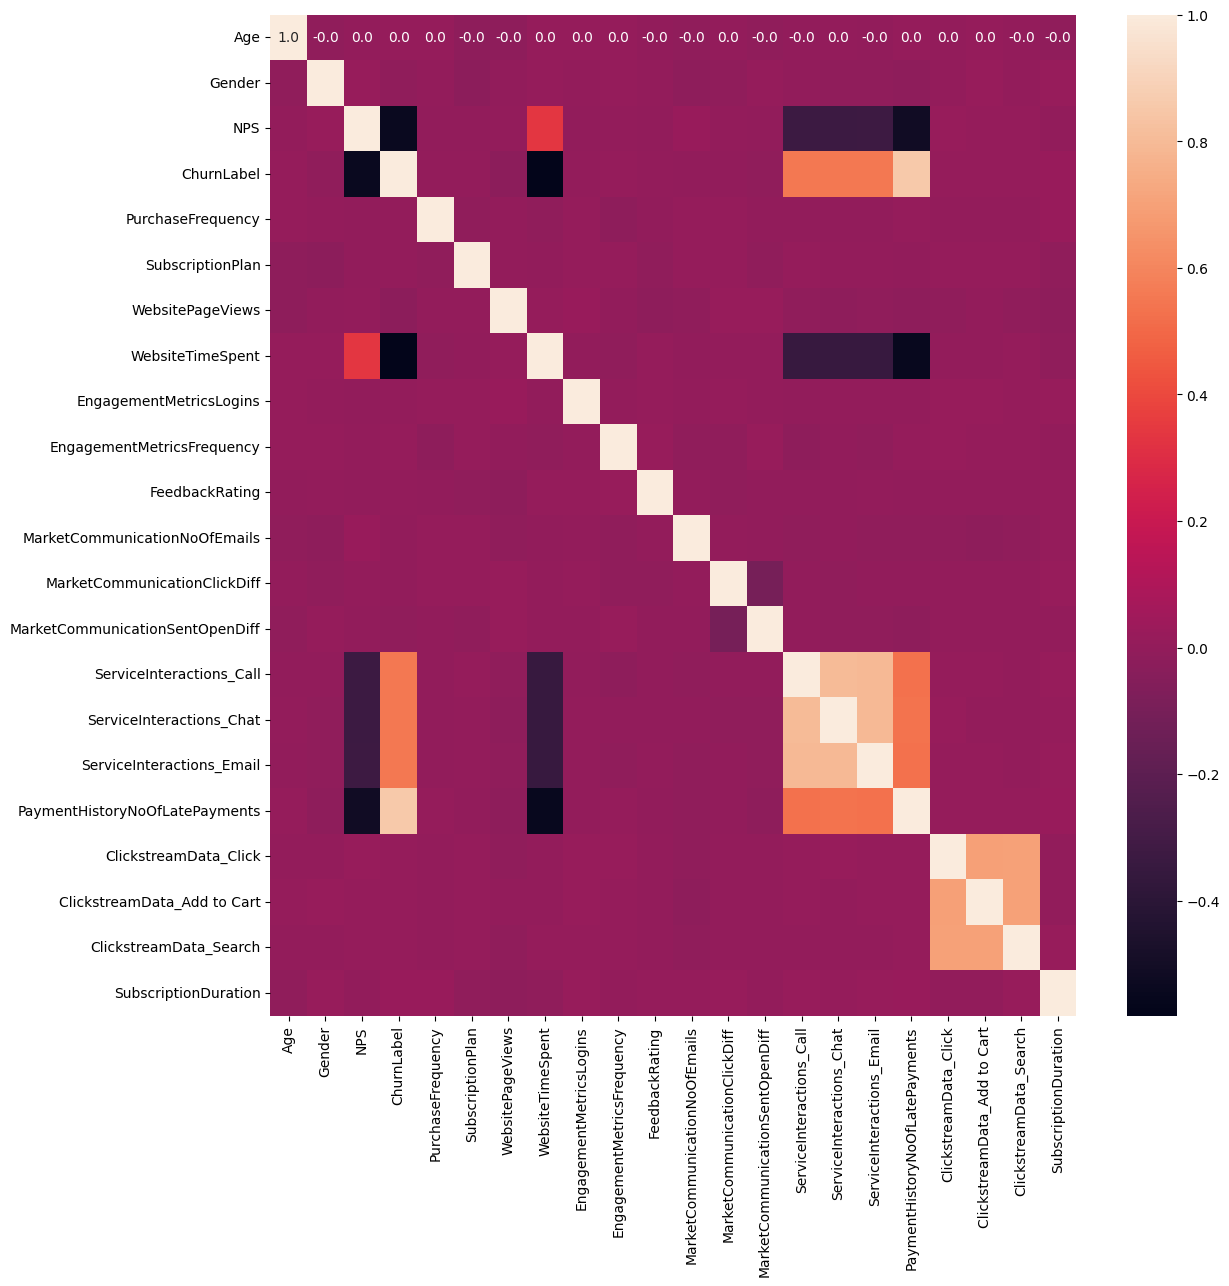

In [38]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()

Split data into train test and validation sets

In [42]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [45]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

# Modeling

Two different models will be used for the modeling:
- Logistic Regression
- DecisionTreeClassifier

Metrics that will be used for the evaluation are:
- Accuracy score
- Precision score
- Recall score
- F1 score

In [51]:
# defining an evaluation function

def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

Beginning the modelling using Logistic regression.  To model with logistic regression, first the model is built

In [59]:
# Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9712597636691368
Train Precision Score: 0.9665288442606812
Train Recall Score: 0.9767210505372065
Train F1 Score: 0.9715982187036121
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


Modelling with decision tree classifier

In [58]:
# Build the model
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)

# # Evaluate the model on train and validation subsets
# evaluate(X_train, y_train, dt, subset='Train')
# evaluate(X_val, y_val, dt, subset='Validation')

Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train F1 Score: 1.0

Validation Accuracy Score: 0.9453333333333334
Validation Precision Score: 0.9559228650137741
Validation Recall Score: 0.9327956989247311
Validation F1 Score: 0.9442176870748299


From the above we can assume there is some form of overfitting because it is quite rare for a model to attain a score of around 1.0 because the validation matrix even though they are over 90% which is quite accurate are less than the train matrix.  

For this reason, damping on the model will be applied by reducing the accuracy to see if it is overfitting or not because the matrix that is of most concern is the validation matrix not really the train matrix because the train matrix is usually better than the validation matrix.

So a feature will be added to the decision tree classifier known as max_depth which is a parameter that decides how far or how deep a relationship should fit into the model.  You can use max_depth of 5.

In [61]:
# Applying damping to on the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, dt, subset='Train')
evaluate(X_val, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9766673342679751
Train Precision Score: 0.9761764126796614
Train Recall Score: 0.9779092702169625
Train F1 Score: 0.9770420731106513
Validation Accuracy Score: 0.9653333333333334
Validation Precision Score: 0.9669421487603306
Validation Recall Score: 0.9616438356164384
Validation F1 Score: 0.9642857142857143


The above seems better than the previous

The conclusion here is that the logistic regression model had a better validation score than the decision tree classifier recall and f1 score

Next is evaluating the model on a test set which is something you test for a production readiness

Evaluation on the Test Set

In [65]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test')
print("-------------------")
evaluate(X_test, y_test, dt, 'DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165897
-------------------
DecisionTreeClassifier Test Accuracy Score: 0.9730967372638809
DecisionTreeClassifier Test Precision Score: 0.9724770642201835
DecisionTreeClassifier Test Recall Score: 0.9735935706084959
DecisionTreeClassifier Test F1 Score: 0.9730349971313826


you can see that apart from where the logistic regression had the upper hand for most of the metrics, the decision tree here has the upper hand.

This shows that in the production environment, things can change slightly which is why there is the train validation and the test set.  These are instances you should always be prepared for.

Next is to create a confusion matrix which helps to visualize how many of these test data/rows of customers were classified rightly or wrongly 

Plot the confusion matrix next

plots will be done for logistic regression and decision classifier tree
For logistic regression, the first thing that will be done since we are plotting for the test set, we need to get the prediction for the test set and then compare it to the actual test value for the churn labels

Text(0.5, 1.0, 'Confusion Matrix on Test Set For Logistic Regression')

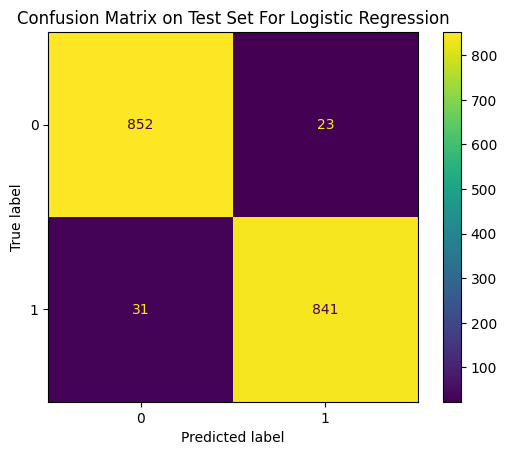

In [67]:
# For logistic regression
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set For Logistic Regression')

The above plot indicates that the LR model was able to predict correctly on 841 and 852 customers churning and not churning respectively.  The model made wrong predictions on 23 and 31 customers.

Next is for decision tree

Text(0.5, 1.0, 'Confusion Matrix on Test Set For Decision Tree')

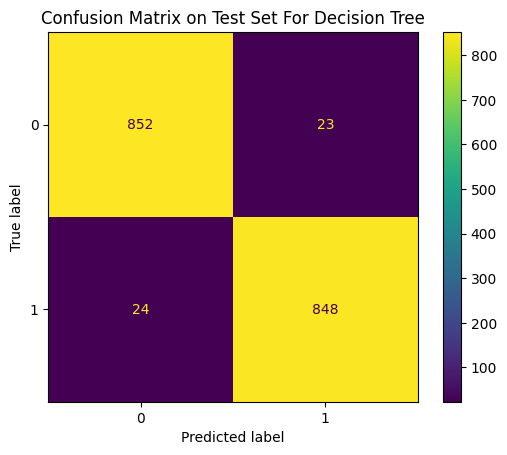

In [69]:
# For logistic regression

# first predict for the test dataset
dt_y_pred = dt.predict(X_test)

# create the decision tree
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set For Decision Tree')

We then see from the above that the decision tree model is better at identifying customers that churned and those that did not churn than the logistic regression model

# Conclusion

The most important features in building the model
- The number of service intercations the customer has had through call, email, and chat
- The number of times the customer has made late payments.
- The time spent on the company's website.
- The Net Promoter Score (NPS).

The four listed parameters above are the most important parameters which determines which customer is more likely to churn and which customer is more likely not to churn